In [182]:
import numpy as np
import pylab as pl
from IPython.html.widgets import *
from IPython.html import widgets
#from ipywidgets import *
from IPython.display import display
import os,sys,glob
from netCDF4 import Dataset
from datetime import datetime,timedelta
from mpl_toolkits.basemap import Basemap

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

# class to plot AoA output in Years lifetime
class AoA_tools:
    
    def __init__(self,path):
        pl.rcParams.update({'font.size': 14})
        self.path = path
        self.forcing = 1e-15*3600*24.0  # mixing ratio day-1
        self.dirname = ['TM5_3x2','TM5_EC_Earth_nudged','TM5_EC_Earth_freerunning']
        self.odir = ['TM5_3x2','TM5_EC_Earth_nudged','TM5_EC_Earth_freerunning']

        self.transpose = [False,False,False]
        self.symbol = ['b','bx-','b+-']
        self.symbol2 = ['b--','b--','b-.']
        self.symbol3 = ['b--','b--','b--']


        self.mname = ['TM5','TM5','TM5']
        self.iname = ['UU','EC_Earth','EC_Earth']
        self.tnames = [
          ['rn222','rn222E','SF6','e90','NHsurface','SHsurface','surface','land','ocean','trop','strat'],
          ['rn222','rn222E','SF6','e90','NHsurface','SHsurface','surface','land','ocean','trop','strat'],
          ['rn222','rn222E','SF6','e90','NHsurface','SHsurface','surface','land','ocean','trop','strat'] ,        
        ]


        self.plot_grid = False
        self.plot_tropo = False
        self.plot_specs = 0
        self.dsf6 = []
        self.dnh  = []
        self.dsh  = []
        self.nh = []
        self.sh = []
        self.latitude = []
        self.d222rn = []
        self.dland  = []
        self.times = []
        for year in range(1988,2015):
            for month in range(1,13):
                self.times.append('year %4.4i month %2.2i'%(year,month))
                
    def figure_za_surface(self):
        dates = []
        for year in range(2000,2011):
            for month in range(1,13):
                dates.append('year %4.4i month %2.2i'%(year,month))
        conversion = 'days'  #               ['mol/mol','nmol/mol','pmol/mol','days','years'
        yaxis = 'trop'    #  ToggleButtons(options=['normal','log','trop','strat']),
        ptype = 'zonal'     #                ptype = ToggleButtons(options=['zonal','latlon','times','spec']),
        amin=0.0    # negative = automatic scaling
        amax=100.0
        plotpres=50   # hPa
#        models = ['LSCE_LMDZ5A', 'TM5_3x2','EMAC_T63','ACTM_T42L67','TOMCAT'] 
        models = ['TM5_3x2','TM5_EC_Earth_nudged','TM5_EC_Earth_freerunning'] 
        # ['LSCE_LMDZ3','LSCE_LMDZ5A','TM5_3x2','TM5_1x1',
                     #  'EMAC_T63','EMAC_T106','ACTM_T42L67','NIES','TOMCAT','GEOS']
        tracers = ['surface'] # '222Rn' '222RnE' 'SF6' 'e90' 'NHsurface' 'SHsurface' 'surface' 'land' 'ocean' 'troposphere' 'stratosphere'
        self.plot_grid = True
        self.plot_tropo = True
        self.plot_savename = 'surface.png'
        self.plot_prog(dates, conversion, yaxis, ptype, amin, amax, 
              plotpres, models, tracers) 
        
    def figure_za_SF6(self):
        dates = []
        for year in range(2000,2011):
            for month in range(1,13):
                dates.append('year %4.4i month %2.2i'%(year,month))
        conversion = 'pmol/mol'  #               ['mol/mol','nmol/mol','pmol/mol','days','years'
        yaxis = 'trop'    #  ToggleButtons(options=['normal','log','trop','strat']),
        ptype = 'zonal'     #                ptype = ToggleButtons(options=['zonal','latlon','times','spec']),
        amin=5.0   #   4.0    # negative = automatic scaling
        amax=19.0 / 3.0 #7.0
        plotpres=50   # hPa
#        models = ['LSCE_LMDZ5A', 'TM5_3x2','EMAC_T63','ACTM_T42L67','TOMCAT'] 
#        models = ['LSCE_LMDZ5A','TM5_3x2','EMAC_T63','ACTM_T42L67','TOMCAT'] 
        models = ['TM5_3x2','TM5_EC_Earth_nudged','TM5_EC_Earth_freerunning'] 
        # ['LSCE_LMDZ3','LSCE_LMDZ5A','TM5_3x2','TM5_1x1',
                     #  'EMAC_T63','EMAC_T106','ACTM_T42L67','NIES','TOMCAT','GEOS']
        tracers = ['SF6'] # '222Rn' '222RnE' 'SF6' 'e90' 'NHsurface' 'SHsurface' 'surface' 'land' 'ocean' 'troposphere' 'stratosphere'
        self.plot_grid = False
        self.plot_tropo = False
        self.plot_prog(dates, conversion, yaxis, ptype, amin, amax, 
              plotpres, models, tracers) 
        
    def figure_za_NHsurface(self):
        dates = []
        for year in range(2000,2011):
            for month in range(1,13):
                dates.append('year %4.4i month %2.2i'%(year,month))
        conversion = 'years'  #               ['mol/mol','nmol/mol','pmol/mol','days','years'
        yaxis = 'trop'    #  ToggleButtons(options=['normal','log','trop','strat']),
        ptype = 'zonal'     #                ptype = ToggleButtons(options=['zonal','latlon','times','spec']),
        amin=0.0    # negative = automatic scaling
        amax=1.4
        plotpres=50   # hPa
#        models = ['LSCE_LMDZ5A', 'TM5_3x2','EMAC_T63','ACTM_T42L67','TOMCAT'] 
        models = ['TM5_3x2','TM5_EC_Earth_nudged','TM5_EC_Earth_freerunning'] 
        # ['LSCE_LMDZ3','LSCE_LMDZ5A','TM5_3x2','TM5_1x1',
                     #  'EMAC_T63','EMAC_T106','ACTM_T42L67','NIES','TOMCAT','GEOS']
        tracers = ['NHsurface'] # '222Rn' '222RnE' 'SF6' 'e90' 'NHsurface' 'SHsurface' 'surface' 'land' 'ocean' 'troposphere' 'stratosphere'
        self.plot_grid = False
        self.plot_tropo = False
        self.plot_savename = 'NHsurface.png'
        self.plot_prog(dates, conversion, yaxis, ptype, amin, amax, 
              plotpres, models, tracers) 
        
    def figure_za_SHsurface(self):
        dates = []
        for year in range(2000,2011):
            for month in range(1,13):
                dates.append('year %4.4i month %2.2i'%(year,month))
        conversion = 'years'  #               ['mol/mol','nmol/mol','pmol/mol','days','years'
        yaxis = 'trop'    #  ToggleButtons(options=['normal','log','trop','strat']),
        ptype = 'zonal'     #                ptype = ToggleButtons(options=['zonal','latlon','times','spec']),
        amin=0.0    # negative = automatic scaling
        amax=1.4
        plotpres=50   # hPa
#        models = ['LSCE_LMDZ5A', 'TM5_3x2','EMAC_T63','ACTM_T42L67','TOMCAT'] 
        models = ['TM5_3x2','TM5_EC_Earth_nudged','TM5_EC_Earth_freerunning'] 
        # ['LSCE_LMDZ3','LSCE_LMDZ5A','TM5_3x2','TM5_1x1',
                     #  'EMAC_T63','EMAC_T106','ACTM_T42L67','NIES','TOMCAT','GEOS']
        tracers = ['SHsurface'] # '222Rn' '222RnE' 'SF6' 'e90' 'NHsurface' 'SHsurface' 'surface' 'land' 'ocean' 'troposphere' 'stratosphere'
        self.plot_grid = False
        self.plot_tropo = False
        self.plot_savename = 'SHsurface.png'
        self.plot_prog(dates, conversion, yaxis, ptype, amin, amax, 
              plotpres, models, tracers) 
        
    def figure_ll_land(self):
        dates = []
        for year in range(2000,2011):
            for month in range(1,13):
                dates.append('year %4.4i month %2.2i'%(year,month))
        conversion = 'days'  #               ['mol/mol','nmol/mol','pmol/mol','days','years'
        yaxis = 'trop'    #  ToggleButtons(options=['normal','log','trop','strat']),
        ptype = 'latlon'     #                ptype = ToggleButtons(options=['zonal','latlon','times','spec']),
        amin=0.0
        amax=120
        plotpres=1000.0
#        models = ['LSCE_LMDZ5A', 'TM5_3x2','EMAC_T63','ACTM_T42L67','TOMCAT'] 
        models = ['TM5_3x2','TM5_EC_Earth_nudged','TM5_EC_Earth_freerunning'] 
        # ['LSCE_LMDZ3','LSCE_LMDZ5A','TM5_3x2','TM5_1x1',
                     #  'EMAC_T63','EMAC_T106','ACTM_T42L67','NIES','TOMCAT','GEOS']
        tracers = ['land'] # '222Rn' '222RnE' 'SF6' 'e90' 'NHsurface' 'SHsurface' 'surface' 'land' 'ocean' 'troposphere' 'stratosphere'
        self.plot_savename = 'land.png'
        self.plot_prog(dates, conversion, yaxis, ptype, amin, amax, 
              plotpres, models, tracers) 

    def figure_ll_ocean(self):
        dates = []
        for year in range(2000,2011):
            for month in range(1,13):
                dates.append('year %4.4i month %2.2i'%(year,month))
        conversion = 'days'  #               ['mol/mol','nmol/mol','pmol/mol','days','years'
        yaxis = 'trop'    #  ToggleButtons(options=['normal','log','trop','strat']),
        ptype = 'latlon'     #                ptype = ToggleButtons(options=['zonal','latlon','times','spec']),
        amin=0.0
        amax=60
        plotpres=1000.0
#        models = ['LSCE_LMDZ5A', 'TM5_3x2','EMAC_T63','ACTM_T42L67','TOMCAT'] 
        models = ['TM5_3x2','TM5_EC_Earth_nudged','TM5_EC_Earth_freerunning'] 
        # ['LSCE_LMDZ3','LSCE_LMDZ5A','TM5_3x2','TM5_1x1',
                     #  'EMAC_T63','EMAC_T106','ACTM_T42L67','NIES','TOMCAT','GEOS']
        tracers = ['ocean'] # '222Rn' '222RnE' 'SF6' 'e90' 'NHsurface' 'SHsurface' 'surface' 'land' 'ocean' 'troposphere' 'stratosphere'
        self.plot_savename = 'ocean.png'
        self.plot_prog(dates, conversion, yaxis, ptype, amin, amax, 
              plotpres, models, tracers) 
        
        
    def figure_za_strat(self):
        dates = []
        for year in range(2000,2011):
            for month in range(1,13):
                dates.append('year %4.4i month %2.2i'%(year,month))
        #dates = ['year 2010 month 01']
        conversion = 'years'  #               ['mol/mol','nmol/mol','pmol/mol','days','years'
        yaxis = 'strat'    #  ToggleButtons(options=['normal','log','trop','strat']),
        ptype = 'zonal'     #                ptype = ToggleButtons(options=['zonal','latlon','times','spec']),
        amin=0.0
        amax=7.0
        plotpres=1000.0
#        models = ['LSCE_LMDZ5A', 'TM5_3x2','EMAC_T63','ACTM_T42L67','TOMCAT'] 
        models = ['TM5_3x2','TM5_EC_Earth_nudged','TM5_EC_Earth_freerunning'] 
        # ['LSCE_LMDZ3','LSCE_LMDZ5A','TM5_3x2','TM5_1x1',
                     #  'EMAC_T63','EMAC_T106','ACTM_T42L67','NIES','TOMCAT','GEOS']
        tracers = ['surface'] # '222Rn' '222RnE' 'SF6' 'e90' 'NHsurface' 'SHsurface' 'surface' 'land' 'ocean' 'troposphere' 'stratosphere'
        self.plot_grid = True
        self.plot_tropo = True
        self.plot_savename = 'strat.png'
        self.plot_prog(dates, conversion, yaxis, ptype, amin, amax, 
              plotpres, models, tracers) 

    def figure_sf6_aoa(self):
        dates = []
        for year in range(2000,2011):
            for month in range(1,13):
                dates.append('year %4.4i month %2.2i'%(year,month))
        conversion = 'years'  #               ['mol/mol','nmol/mol','pmol/mol','days','years'
        yaxis = 'trop' #'strat'    #  ToggleButtons(options=['normal','log','trop','strat']),
        ptype = 'spec'     #                ptype = ToggleButtons(options=['zonal','latlon','times','spec']),
        amin=0.0
        amax=60.0 / 0.9
        plotpres=1000.0
#        models = ['LSCE_LMDZ5A', 'TM5_3x2','EMAC_T63','ACTM_T42L67','TOMCAT'] 
#        models = ['LSCE_LMDZ5A','TM5_3x2','EMAC_T63','ACTM_T42L67','TOMCAT'] 
        models = ['TM5_3x2','TM5_EC_Earth_nudged','TM5_EC_Earth_freerunning'] 
        # ['LSCE_LMDZ3','LSCE_LMDZ5A','TM5_3x2','TM5_1x1',
                     #  'EMAC_T63','EMAC_T106','ACTM_T42L67','NIES','TOMCAT','GEOS']
        tracers = ['SF6','NHsurface','SHsurface'] # '222Rn' '222RnE' 'SF6' 'e90' 'NHsurface' 'SHsurface' 'surface' 'land' 'ocean' 'troposphere' 'stratosphere'
        self.plot_grid = False
        self.plot_tropo = False
        self.plot_specs = 1
        self.plot_savename = 'sf6_aoa.png'
        self.plot_prog(dates, conversion, yaxis, ptype, amin, amax, 
              plotpres, models, tracers) 

    def figure_sf6_aoa_b(self):
        f,ax = pl.subplots(1,figsize=(8,6))
        symbol2 = ['r-','r--']
        models = ['TM5_3x2','TM5_EC_Earth_nudged','TM5_EC_Earth_freerunning'] 

        for i in range(2):
            nh = self.nh[i]
            sh = self.sh[i]
            lat = self.latitude[i]
            nh = nh[::-1]  # mirror NH
            tdiff = sh - nh
            ax.plot(lat,tdiff,symbol2[i],linewidth=2, label = models[i])
        ax.set_xlim([0,90])
        ax.grid(True)
        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        ax.set_ylabel('Age of Air N-S difference (year)')
        ax.set_xlabel('|latitude|')
        pl.subplots_adjust(top=0.95, bottom=0.15, left=0.15, right=0.65)
        f.savefig('sf6_aoa_b.png')
        f.show()
 
         
    def figure_sf6_aoa2(self):
        models = ['TM5_3x2','TM5_EC_Earth_nudged','TM5_EC_Earth_freerunning'] 
        colors = ['b','b']
        dsf6 = np.array(self.dsf6)
        dsh = np.array(self.dsh)
        dnh = np.array(self.dnh)

        f,ax = pl.subplots(figsize=(8,6))
        ax.scatter(
            dsf6, dsh+dnh, marker='o', c=colors, s=150)
        xx1 = [ 30, 130,   0, 20, -20, 130, 100,  130, -25, -20]
        yy1 = [-50,   0,  55, 85,  10,    0, 30,  -30,   0, -20]


        for label, x, y, xx, yy in zip(models, dsf6, dsh+dnh, xx1, yy1):
            ax.annotate(label, xy=(x, y), xytext=(xx, yy),
               textcoords='offset points', ha='right', va='bottom',
                bbox=dict(boxstyle='round,pad=0.5', fc='lightgrey', alpha=0.9),
                arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
        ax.set_ylabel('SF6 relative to South Pole (pmol/mol)')
        ax.set_ylim([1.5,2.2])
        ax.set_xlim([0.25,0.45])
        ax.grid(True)
        ax.set_ylabel('Composite AoA (year)')
        ax.set_xlabel('SF6 gradient between 50N and South Pole (pmol/mol)')
        f.savefig('sf6_aoa2.png')
        f.show()
        

    def figure_rn_aoa(self):
        dates = []
        for year in range(2000,2011):
            for month in range(1,13):
                dates.append('year %4.4i month %2.2i'%(year,month))
        conversion = 'days'  #               ['mol/mol','nmol/mol','pmol/mol','days','years'
        yaxis = 'trop' #'strat'    #  ToggleButtons(options=['normal','log','trop','strat']),
        ptype = 'spec'     #                ptype = ToggleButtons(options=['zonal','latlon','times','spec']),
        amin=0.0
        amax=60.0 / 0.9
        plotpres=1000.0
#        models = ['LSCE_LMDZ5A', 'TM5_3x2','EMAC_T63','ACTM_T42L67','TOMCAT'] 
#        models = ['LSCE_LMDZ5A','TM5_3x2','EMAC_T63','ACTM_T42L67','TOMCAT'] 
        models = ['TM5_3x2','TM5_EC_Earth_nudged','TM5_EC_Earth_freerunning'] 
        # ['LSCE_LMDZ3','LSCE_LMDZ5A','TM5_3x2','TM5_1x1',
                     #  'EMAC_T63','EMAC_T106','ACTM_T42L67','NIES','TOMCAT','GEOS']
        tracers = ['rn222','land'] # '222Rn' '222RnE' 'SF6' 'e90' 'NHsurface' 'SHsurface' 'surface' 'land' 'ocean' 'troposphere' 'stratosphere'
        self.plot_grid = False
        self.plot_tropo = False
        self.plot_specs = 2
        self.plot_savename = 'rn_aoa.png'
        self.plot_prog(dates, conversion, yaxis, ptype, amin, amax, 
              plotpres, models, tracers) 

    def figure_rn_aoa2(self):
        models = ['TM5_3x2','TM5_EC_Earth_nudged','TM5_EC_Earth_freerunning'] 
        colors = ['b','b']
        d222rn = np.array(self.d222rn)
        dland = np.array(self.dland)

        f,ax = pl.subplots(figsize=(8,6))
        ax.scatter(
            d222rn, dland, marker='o', c=colors, s=150)
        xx1 = [130, 140,  50,  65,  65,  60,  85, 100, -20, -20]
        yy1 = [ 10, -10,  20, -35,  53, -50,  65, -40,   0,   0]

        for label, x, y, xx, yy in zip(models, d222rn, dland, xx1, yy1):
            ax.annotate(label, xy=(x, y), xytext=(xx, yy),
               textcoords='offset points', ha='right', va='bottom',
                bbox=dict(boxstyle='round,pad=0.5', fc='lightgrey', alpha=0.9),
                arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
        ax.set_ylim([10,50])
        ax.set_xlim([1.2,2.2])
        ax.grid(True)
        ax.set_ylabel('Land AoA(500 hPa)- AoA(950 hPa) (days)')
        ax.set_xlabel('Ln(222Rn) 950 hPa - Ln(222Rn) 500 hPa')
        f.savefig('rn_aoa2.png')
        f.show()

    def figure_e90_surf(self):
        ''' map the tropopause with e90 < 88 ppb and surface > 90 days'''
        dates = []
        for year in range(2000,2011):
            for month in range(1,13):
                dates.append('year %4.4i month %2.2i'%(year,month))
        conversion = 'days'  #               ['mol/mol','nmol/mol','pmol/mol','days','years'
        yaxis = 'normal' #'strat'    #  ToggleButtons(options=['normal','log','trop','strat']),
        ptype = 'spec'     #                ptype = ToggleButtons(options=['zonal','latlon','times','spec']),
        amin= 90
        amax= 200.
        plotpres=50.0
#        models = ['LSCE_LMDZ5A', 'TM5_3x2','EMAC_T63','ACTM_T42L67','TOMCAT'] 
#        models = ['LSCE_LMDZ5A','TM5_3x2','EMAC_T63','ACTM_T42L67','TOMCAT'] 
        models = ['TM5_3x2','TM5_EC_Earth_nudged','TM5_EC_Earth_freerunning'] 
        # ['LSCE_LMDZ3','LSCE_LMDZ5A','TM5_3x2','TM5_1x1',
                     #  'EMAC_T63','EMAC_T106','ACTM_T42L67','NIES','TOMCAT','GEOS']
        tracers = ['e90','surface'] # '222Rn' '222RnE' 'SF6' 'e90' 'NHsurface' 'SHsurface' 'surface' 'land' 'ocean' 'troposphere' 'stratosphere'
        self.plot_savename = 'e90_surf.png'
        self.plot_specs = 3
        self.plot_prog(dates, conversion, yaxis, ptype, amin, amax, 
              plotpres, models, tracers) 
        


    def plot_prog( self,  dates, conversion, yaxis, ptype,amin,amax,plotpres, models,tracers):
        self.amax = amax
        self.amin = amin
        self.dates = dates
        self.plotpres = plotpres
        cpath = os.getcwd()
        os.chdir(self.path)
        itimes = []
        for idate in dates:
            itimes.append(self.times.index(idate))
        self.year = int(dates[0].split()[1])
        self.month = int(dates[0].split()[3])
        tstart = datetime(1988,1,1,0,0,0)
      
        # get end time:
        tss = datetime(self.year,self.month,1,0,0,0)
        if len(dates) == 1:
            monthp1 = self.month + 1
            yearp1 = self.year
            if monthp1 ==13:
                monthp1 = 1
                yearp1 = self.year + 1
            xdt = datetime(yearp1,monthp1,1,0,0,0) - tss
            tanal = tss + xdt/2
        else:
            yeare = int(dates[-1].split()[1])
            monthe = int(dates[-1].split()[3])
            monthp1 = monthe + 1
            yearp1 = yeare
            if monthp1 ==13:
                monthp1 = 1
                yearp1 = yeare + 1
        xdt = datetime(yearp1,monthp1,1,0,0,0) - tss
        tanal = tss + xdt/2
        #print(tstart,tanal,tss,xdt)
        self.dt = (tanal-tstart).days + (tanal-tstart).seconds/(3600.*24.)
        #print(self.dt)
        
        # for time series: get list of datetimes:
        if len(dates) > 1:
            self.xtimes = []
            self.xdt = []
            for idate in dates:
                year = int(idate.split()[1])
                month = int(idate.split()[3])
                monthp1 = month + 1
                yearp1 = year
                datet1 = datetime(year,month,1)
                if monthp1 ==13:
                    monthp1 = 1
                    yearp1 = year + 1
                datet2 = datetime(yearp1,monthp1,1)
                dt = datet2-datet1
                xanal = datet1 + dt/2
                self.xtimes.append(xanal)
                self.xdt.append((xanal-tstart).days + (xanal-tstart).seconds/(3600.*24.))
        if ptype == 'spec' :
            if self.plot_specs==1:
                f,ax = pl.subplots(3,figsize=(15,12),sharex=True)
            elif self.plot_specs==2:
                f,ax = pl.subplots(1,2,figsize=(15,8),sharey=True)
            elif self.plot_specs==3:
                f,ax = pl.subplots(1,figsize=(10,8))
            elif self.plot_specs==4:
                ax = []
        self.first_tracer = True
        for tracer in tracers:
            self.tracer = tracer
            nmodels = len(models)
            if ptype != 'times' and ptype != 'spec':
                if (nmodels == 5 and ptype == 'latlon'):
                    f,ax = pl.subplots(nmodels,figsize=(9,nmodels*5),sharex=True)   
                elif (nmodels == 6 and ptype == 'latlon'):
                    f,ax = pl.subplots(3,2,figsize=(15,12),sharex=True,sharey=True)
                elif (nmodels == 6 and ptype == 'zonal'):
                    f,ax = pl.subplots(3,2,figsize=(15,12),sharex=True,sharey=False)
                else:
                    f,ax = pl.subplots(nmodels,figsize=(12,nmodels*5),sharex=True,sharey=False)
            elif ptype == 'times':
                f,ax = pl.subplots(1,figsize=(12,5))   
            else:
                None
            itracer = self.tnames[0].index(tracer)
            self.ipl = 0
            self.first_model = True
            for i,model in enumerate(models):
                self.model = model
                if ptype != 'times' and ptype != 'spec':
                    if nmodels == 1: 
                        axi = ax
                    elif ax.ndim == 1:
                        axi = ax[i]
                    else: # dim = 2
                        ydim = ax.shape[0]
                        xdim = ax.shape[1]
                        axi = ax[np.mod(i,ydim),i/ydim]
                else:
                    axi=ax
                #try:
                longitude,latitude,pressure,conc = self.get_fields(model,itracer,itimes)
                #except:
                #    continue  # skip this model if fail
                if ptype == 'zonal':
                    if i == 0:
                        conc = conc.mean(axis=0)   # average over the times
                        pressure = pressure.mean(axis=0) # average over times
                        #print(np.mean(conc),np.mean(pressure))
                        axp = self.plot_za(axi,conc,latitude,pressure,conversion,yaxis,itracer,itimes)
                    else:
                        longitude_offline,latitude_offline,pressure_offline,conc_offline = self.get_fields(models[0],itracer,itimes)
#                         print('shape mean',np.shape(conc.mean(axis=0)),'shape offline',np.shape(conc_offline.mean(axis=0)))
#                         print(np.shape(pressure.mean(axis=0)),np.shape(pressure_offline.mean(axis=0)))
#                         print(pressure.mean(axis=0)[:,0,0],pressure_offline.mean(axis=0)[:,0,0])
#                         print(pressure.mean(axis=0)[:,80,100],pressure_offline.mean(axis=0)[:,80,100])
                        pressure_mean=pressure.mean(axis=0)
                        pressure_offline_mean=pressure_offline.mean(axis=0)
                        pressure_offline_mean_onlineshaped=np.zeros(np.shape(pressure_mean))
                        conc_offline_mean_onlineshaped=np.zeros(np.shape(pressure_mean))
#                         print(np.shape(conc_offline_mean_onlineshaped),np.shape(pressure_offline_mean_onlineshaped))
                        conc_offline_mean=conc_offline.mean(axis=0)
#                         for i in np.arange(34):
# #                             print(i)
#                             for lat in np.arange(90):
#                                 for lon in np.arange(120):
#                                     #print(lat,lon)
#                                     # find pressure level where TM5-Offline is closest to TM5-ECEarth
#                                     a = np.where(pressure_offline_mean[:,lat,lon]==find_nearest(pressure_offline_mean[:,lat,lon],pressure_mean[i,lat,lon]))
#                                     #print(a)
#                                     # Put pressure TM5-Offline value in corresponding place in pressure array
#                                     pressure_offline_mean_onlineshaped[i,lat,lon]=pressure_offline_mean[a,lat,lon]
#                                     #print(pressure_offline_mean_onlineshaped[i,lat,lon])
#                                     # Put concentration in corresponding place in concentration array
#                                     conc_offline_mean_onlineshaped[i,lat,lon]=conc_offline_mean[a,lat,lon]
#                                     #print(conc_offline_mean_onlineshaped[i,lat,lon])
                        conc = conc.mean(axis=0)#-conc_offline_mean_onlineshaped   # average over the times
                        pressure = pressure.mean(axis=0)#-pressure_offline_mean_onlineshaped # average over times
#                         print(np.mean(conc),np.mean(pressure))
#                         print(pressure[:,0,0])
#                         print(np.mean(conc_offline),np.mean(pressure_offline))
                        axp = self.plot_za(axi,conc,latitude,pressure,conversion,yaxis,itracer,itimes)
                elif ptype == 'latlon':
                    conc = conc.mean(axis=0)   # average over the times
                    ip = 0
                    axp = self.plot_ll(axi,conc,longitude,latitude,conversion,ip,1e5)
                elif ptype == 'spec':   # special plotting routine to test:
                    conc = conc.mean(axis=0)   # average over the times
                    self.plot_spec(ax,conc,longitude,latitude,pressure,conversion,yaxis)                   
                elif ptype == 'times':
                    # time series plot: use parts of the output array to plot:
                    if len(dates) == 1: print('Please select multiple times!')
                    conc = conc.mean(axis=3)  # longitude average:
                    axp = self.plot_ts(axi,conc,latitude,pressure,conversion)
                self.ipl +=1
                if self.first_model == True:
                    cax = f.add_axes([0.92, 0.65, 0.03, 0.25])
                    cbar = f.colorbar(axp,cax=cax)
                    cbar.set_label(conversion)
                self.first_model = False
            print('ptype:',ptype)
            if ptype != 'times' and ptype != 'spec':
                cax = f.add_axes([0.92, 0.1, 0.03, 0.52])
                cbar = f.colorbar(axp,cax=cax)
                cbar.set_label(conversion)
                #f.savefig(self.plot_savename)
                f.show()
            elif ptype != 'spec':
                #  axi.legend(loc='best')
                axi.set_title(self.tracer)
                f.autofmt_xdate()
                f.savefig(self.plot_savename)
                f.show()
            else:   # special plot over multiple tracers:
                None
            self.first_tracer = False
        if ptype == 'spec' :
            if self.plot_specs == 1:
                for axi in [ax[0],ax[1]]:
                    axi.set_xlim([-90,90])
                    axi.grid(True)
                    if (axi == ax[0]) : axi.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
                    if (axi == ax[0]) : axi.set_title('Zonal average over all longitudes')
                    if (axi == ax[1]) : axi.set_title('Pacific Ocean zonal average')
                    # overplot measurements HATS/CATS (Notebook on Laptop)
                    sf6 = np.array([ 0.34772727,  0.35795455,  0.33661364,  0.30946212,  0.24039394,
                        0.07897727,  0.0105    ,  0.        ,  0.3600303 ])
                    stdev = np.array([0.041640250579452059, 0.047112994996292283, 0.055300233947567071, 0.053183274498751494,
                         0.033316152597127918, 0.035120456334849094, 0.022982371373280745, 0.0, 0.044242777084520797])
                    lat = [82.5, 71.3, 40.052, 19.5, 19.5, -14.3, -40.7, -90, 53]
                    snames = ['alt','brw','nwr','kum','mlo','smo','cgo','spo','mhd']
                    axi.errorbar(lat,sf6,yerr=stdev,fmt='o',color='grey',ecolor='grey',elinewidth=3,capsize=4,capthick=3)


                    for xlat,xname,xsf6 in zip(lat,snames,sf6):
                        if xname != 'kum':
                            if axi == ax[1]:
                                axi.text(xlat,-0.04,xname)
                            else:
                                axi.text(xlat,-0.08,xname)
                        else:
                            axi.text(xlat,0.0,xname)
                            axi.set_ylabel('SF6 w.r.t. South Pole (pmol/mol)')
                        if axi == ax[1]:
                            axi.set_ylim([-0.05,0.45])

                            axi = ax[2]
                            axi.set_ylim([0.4,1.2])
                            axi.grid(True)
                            axi.set_ylabel('Age of Air (year)')
                            axi.set_xlabel('Latitude')
                            pl.subplots_adjust(top=0.95, bottom=0.10, left=0.10, right=0.65)
                            f.savefig(self.plot_savename)
                            f.show()
                        elif self.plot_specs == 2:
                            axi = ax[0]
                            axi.set_ylim([1000,100])
                            axi.set_xscale("log")
                            axi.set_xlim([1e-21,1e-19])
                            axi.set_xlabel('222Rn mixing ratio (mol/mol)')
                            axi.set_ylabel('Pressure (hPa)')
                            axi.grid(True)

                            axi = ax[1]
                            axi.grid(True)
                            axi.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
                            axi.set_xlabel('Land AoA (days)')
                            axi.set_xlim([0,170])
                            pl.subplots_adjust(top=0.95, bottom=0.10, left=0.10, right=0.65)
                            f.savefig(self.plot_savename)
                        elif self.plot_specs == 3:
                            axi = ax
                            axi.set_ylim([350,50])
                            axi.set_xlim([-90,90])
                            axi.set_xlabel('Latitude')
                            axi.set_ylabel('Pressure (hPa)')
                            axi.grid(True)
                            axi.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
                            pl.subplots_adjust(top=0.95, bottom=0.10, left=0.10, right=0.65)
                            f.savefig(self.plot_savename)

        os.chdir(cpath)
        
    def get_fields(self,model,itracer,itimes):
        ''' get the 3D concentration field for model for itracer and itimes'''
        imodel = self.odir.index(model)
        self.imodel = imodel
        dsname = "%s/mmean.%s.%s.%s.nc"%(model,self.mname[imodel],self.iname[imodel],self.tnames[imodel][itracer])
        print('in get fields:', dsname)
        if model == 'GEOS':
            if self.year < 1998:
                dsname = dsname[:dsname.find('.nc')]+'_1988_1997.nc'
            elif self.year < 2000:
                dsname = dsname[:dsname.find('.nc')]+'.1994-1999.nc'
                itimes = np.array(itimes) - 12*5
            else:
                sys.exit(2)
        if model == 'TOMCAT':
            dsname = '%s/%s_monthly_TOMCAT_ref1SD_r4i1p1_198801_201112.nc'%(model,self.tnames[imodel][itracer])
        if model == 'TM5_EC_Earth_freerunning':
            dsname = "%s/mmean.%s.%s_no_nudging.%s.nc"%(model,self.mname[imodel],self.iname[imodel],self.tnames[imodel][itracer])
            print(dsname)
        ds = Dataset(dsname,'r')
        if model != 'TOMCAT':
            latitude = ds.variables['latitude'][:]
            longitude = ds.variables['longitude'][:]
        else:
            latitude = ds.variables['lat'][:]
            longitude = ds.variables['lon'][:]
            
        # get and construct 3d pressure field:
            
        if model == 'GEOS':
            alpha = ds.variables['alpha'][:]
            beta = ds.variables['beta'][:]
            pedge = alpha + beta*1e3
            pressure = 50*(pedge[0:-1] + pedge[1:])  # Pa
        elif model == 'ACTM_T42L67':
            dsname = '%s/mmean.ACTM.JAMSTEC.press.nc'%(model)
            ds1 = Dataset(dsname,'r')
            pressure = ds1.variables['conc'][itimes]  # time,level,lat,lon
            ds1.close()
            pressure = pressure*1e2   # Pa
        elif model.startswith('TM5'):
            if model == 'TM5_3x2':
                dsname = '%s/presm.TM5.UU.nc'%(model)
                ds1 = Dataset(dsname,'r')
                at = ds1.variables['presm'].at
                bt = ds1.variables['presm'].bt
            elif model == 'TM5_EC_Earth_nudged':
                dsname = '%s/presm.TM5.EC_Earth.nc'%(model)
                ds1 = Dataset(dsname,'r')
                itimes = np.array(itimes) - 12*2
                if(itimes[0] < 0) :sys.exit(2)
                a_ec = np.array([ 0.000000, 21.413612, 76.167656, 204.637451,   450.685791, 857.945801, 1463.163940,  
                        2292.155518, 3358.425781,  4663.776367, 6199.839355,  7341.469727, 8564.624023, 
                        9873.560547, 11262.484375, 12713.897461, 14192.009766, 15638.053711, 16990.623047, 
                        18191.029297, 19184.544922, 19919.796875, 20348.916016, 20319.011719, 19348.775391, 
                        17385.595703, 14665.645508, 11543.166992,  8356.252930,  5422.802734, 
                        3010.146973,  1297.656128, 336.772369,     6.575628, 0.000000])
                b_ec = np.array([ 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 
                         0.000000, 0.000000, 0.000000, 0.000055, 0.000279, 0.001000, 0.002765, 0.006322, 0.012508, 
                         0.022189, 0.036227, 0.055474, 0.080777, 0.112979, 0.176091, 0.259554,  0.362203, 0.475016, 
                         0.589317, 0.698224, 0.795385,  0.875518, 0.935157, 0.973466, 0.994204, 1.000000 ])
                at = a_ec[::-1]
                bt = b_ec[::-1]
            elif model == 'TM5_EC_Earth_freerunning':
                dsname = '%s/presm.TM5.EC_Earth_no_nudging.nc'%(model)
                ds1 = Dataset(dsname,'r')
                itimes = np.array(itimes) - 12*2
                if(itimes[0] < 0) :sys.exit(2)
                a_ec = np.array([ 0.000000, 21.413612, 76.167656, 204.637451,   450.685791, 857.945801, 1463.163940,  
                        2292.155518, 3358.425781,  4663.776367, 6199.839355,  7341.469727, 8564.624023, 
                        9873.560547, 11262.484375, 12713.897461, 14192.009766, 15638.053711, 16990.623047, 
                        18191.029297, 19184.544922, 19919.796875, 20348.916016, 20319.011719, 19348.775391, 
                        17385.595703, 14665.645508, 11543.166992,  8356.252930,  5422.802734, 
                        3010.146973,  1297.656128, 336.772369,     6.575628, 0.000000])
                b_ec = np.array([ 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 
                         0.000000, 0.000000, 0.000000, 0.000055, 0.000279, 0.001000, 0.002765, 0.006322, 0.012508, 
                         0.022189, 0.036227, 0.055474, 0.080777, 0.112979, 0.176091, 0.259554,  0.362203, 0.475016, 
                         0.589317, 0.698224, 0.795385,  0.875518, 0.935157, 0.973466, 0.994204, 1.000000 ])
                at = a_ec[::-1]
                bt = b_ec[::-1]
            elif model != 'TM5_EC_Earth':
                dsname = '%s/presm.TM5.UU.nc'%(model)
                ds1 = Dataset(dsname,'r')
                at = ds1.variables['presm'].at
                bt = ds1.variables['presm'].bt
            else:
                dsname = '%s/presm.TM5.EC_Earth.nc'%(model)
                ds1 = Dataset(dsname,'r')
                itimes = np.array(itimes) - 12*2
                if(itimes[0] < 0) :sys.exit(2)
                a_ec = np.array([ 0.000000, 21.413612, 76.167656, 204.637451,   450.685791, 857.945801, 1463.163940,  
                        2292.155518, 3358.425781,  4663.776367, 6199.839355,  7341.469727, 8564.624023, 
                        9873.560547, 11262.484375, 12713.897461, 14192.009766, 15638.053711, 16990.623047, 
                        18191.029297, 19184.544922, 19919.796875, 20348.916016, 20319.011719, 19348.775391, 
                        17385.595703, 14665.645508, 11543.166992,  8356.252930,  5422.802734, 
                        3010.146973,  1297.656128, 336.772369,     6.575628, 0.000000])
                b_ec = np.array([ 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 
                         0.000000, 0.000000, 0.000000, 0.000055, 0.000279, 0.001000, 0.002765, 0.006322, 0.012508, 
                         0.022189, 0.036227, 0.055474, 0.080777, 0.112979, 0.176091, 0.259554,  0.362203, 0.475016, 
                         0.589317, 0.698224, 0.795385,  0.875518, 0.935157, 0.973466, 0.994204, 1.000000 ])
                at = a_ec[::-1]
                bt = b_ec[::-1]
             
            presm = ds1.variables['presm'][itimes]
            ntim = presm.shape[0]
            nlon = presm.shape[2]
            nlat = presm.shape[1]
            nlev = at.shape[0]-1
            ds1.close()
            # fill 3D pressure at mid-level:
            pressure = np.zeros((ntim,nlev,nlat,nlon))
            for i,pres in enumerate(presm):
                for l in range(nlev):
                    pressure[i,l,:,:] = 0.5*(at[l]+at[l+1]) + pres*0.5*(bt[l]+bt[l+1])
            #print('pressure=',np.shape(pressure))
        elif model.startswith('LSCE'):
            dsname = '%s/LMDZ.LSCE.Pres.mm.1988-2014.nc'%(model)   # note bottom layer...
            ds1 = Dataset(dsname,'r')
            ppres = ds1.variables['pressure'][:,:,:,itimes]   # pressure system LMDZ 39 layers!
            ap = [ 0., 281.706852929675, 636.375366859432, 1136.4155943717,
              1849.44737296152, 2837.9280405897, 4157.50869711024, 5852.26417553552,
              7944.82760257521, 10419.7321060548, 13199.5402485757, 16116.838631109,
              18892.5506083084, 21142.7861688347, 22446.8782335346, 22497.7595057074,
              21289.4514040892, 19186.4448521733, 16726.0167170181, 14296.6075398689,
              12045.5252156898, 10008.0699708566, 8195.30688158518, 6609.57734809348,
              5246.06241645797, 4093.97069658929, 3137.87110503367, 2359.06747638525,
              1736.92080010302, 1250.0441331629, 877.317766066104, 598.69518472359,
              395.791432392045, 252.262962812769, 154.001062228325, 89.1691757654163,
              48.118336844774, 23.2150838051844, 8.61367138231894, 0. ]
            bp = [ 1., 0.988762998564637, 0.974701632524877, 0.955030180542262,
              0.927265686818222, 0.889271183017204, 0.839314287303751,
              0.776176963345792, 0.699355000528228, 0.609380929528209,
              0.508279179863367, 0.400093029287433, 0.291276044521652, 0.1905059741263,
              0.107270901645713, 0.0488076380330498, 0.0163000324948695,
              0.00344452582803985, 0.000364568302239398, 1.32673501351578e-05,
              8.94025963956579e-08, 3.93038386309706e-11, 1.85617183702948e-16,
              3.81418691876566e-25, 9.62385916256612e-40, 4.5206602224536e-65,
              1.46258410571586e-110, 2.18996926640889e-195, 0., 0., 0., 0., 0., 0., 0., 0., 0.,
              0., 0., 0. ]
            nlev = ppres.shape[2]
            pressure = np.zeros(ppres.shape)
            for l in range(nlev):
                pressure[:,:,l,:] = 0.5*(ap[l]+ap[l+1]) + 0.5*ppres[:,:,0,:]*(bp[l]+bp[l+1])
            ds1.close()
        elif model == 'TOMCAT':
            met = Dataset("TOMCAT/plev_monthly_TOMCAT_ref1SD_r4i1p1_198801_201112.nc",'r')
            pressure = met.variables['plev'][itimes]  # somewhere over the ocean
            met.close()
        else:
            pressure = ds.variables['pressure'][:]                
        if model == 'EMAC_T63': 
            pressure = pressure[:,50,100] # profile ocean.
        elif model == 'EMAC_T106':
            pressure = pressure[:,100,200] # profile ocean.
        if model == 'NIES':
            dsname = '%s/mmean.NIES-TM.NIES.p.nc'%(model)
            ds1 = Dataset(dsname,'r')
            pressure = ds1.variables['conc'][itimes]  # time,level,lat,lon
            ds1.close()

            #pressure = pressure*1e2
        
        # finally get the dataset needed: also sample the pressures selected:
        if self.transpose[imodel]:
            conc = ds.variables['conc'][:,:,:,itimes]
            conc = np.transpose(conc,axes=[3,2,1,0])
            pressure = np.transpose(pressure,axes=[3,2,1,0])
        else:
            if model.startswith('EMAC'):
                conc,pressure = self.get_emac_txxx_conc(ds,itimes)
            elif model == 'TOMCAT':
                conc = ds.variables[self.tnames[imodel][itracer]][itimes]
                longitude = longitude - 180.0
                conc = np.roll(conc,longitude.shape[0]/2,axis=3)
                pressure = np.roll(pressure,longitude.shape[0]/2,axis=3)
                # TOMCAT has pressure reversed:
                pressure = pressure[:,::-1,:,:]
                conc = conc[:,::-1,:,:]
            elif model == 'NIES':    # starts a zero lon, and has extra row...correct!
                conc = ds.variables['conc'][itimes]
                conc = conc[:,:,:,:]
                longitude = longitude[:]
                pressure = pressure[:,:,:,:]
                #conc = np.roll(conc,longitude.shape[0]/2+2,axis=3)
                #pressure = np.roll(pressure,longitude.shape[0]/2+2,axis=3)
            else:
                conc = ds.variables['conc'][itimes]
        # make sure ordered in the right way!
        ds.close()
        #print(conc.min(),conc.max())
        #print(longitude)
        #print(latitude)
        #print(pressure)
        return longitude,latitude,pressure,conc
        
    def plot_spec( self, axi, conc, longitude, latitude, pressure, conversion, yaxis):
        from scipy import interpolate
        from copy import deepcopy
        aoalist = ['NHsurface','SHsurface','surface','land','ocean','troposphere','stratosphere'] 
        # take zonal average: for SF6 avoid land masses and take pacific ocean average basically -180 < lat < -120
        if longitude.min() > -1. :
            logical_mask = np.zeros((len(longitude)), bool)
            logical_mask[:] = np.ma.masked_inside(longitude,150,210).mask
            idx = np.where(logical_mask)[0]
        else:
            logical_mask = np.zeros((len(longitude),2), bool)
            logical_mask[:,0] = np.ma.masked_inside(longitude,150,179.5).mask
            logical_mask[:,1] = np.ma.masked_inside(longitude,-180,-150).mask
            idx = np.where(np.any(logical_mask,axis=1))[0]
        conc2 = deepcopy(conc)
        pressure2 = deepcopy(pressure)
        pressure2 = pressure2.mean(axis=0)  # time
        pressure2 = pressure2.take(idx,axis=2)   # clean sector pressure!
        conc2 = conc2.take(idx,axis=2)
        conc = conc.mean(axis=2)
        conc2 = conc2.mean(axis=2)


        # TOMCAT AoA tracers already converted
        if self.model == 'TOMCAT' and self.tracer in aoalist: 
            #print('conversion')
            conc = (self.dt - 365*conc)*self.forcing
            
        if self.model != 'TM5_EC_Earth_nudged' :
            deltat = self.dt
        else:
            deltat = self.dt - (365+366)    # no 1988 and 1989!


        if (conversion=='days' and self.tracer in aoalist):
            if self.model == 'GEOS': conc -= 100e-9
            conc = (deltat - conc/self.forcing)
        elif (conversion=='years' and self.tracer in aoalist): 
            if self.model == 'GEOS': conc -= 100e-9
            conc = (deltat - conc/self.forcing)/365.
        elif conversion=='pmol/mol':
            conc = conc*1e12
        elif conversion=='nmol/mol':
            conc = conc*1e9
        if (conversion.endswith('mol/mol')):
            zmin = conc.min()
        else:
            zmin = 0.0
        if self.tracer == 'SF6' and self.plot_specs != 4:
            ax = axi[0]
            dconc = conc[0,np.argmin(latitude)]
            conc -= dconc
            conc = conc*1e12
            #print(self.model,max(conc[0,:]))
            ax.plot(latitude,conc[0,:],self.symbol2[self.imodel],linewidth=2, label = self.model)
            #self.dsf6.append(max(conc[0,:]))
#            if latitude[0] < 0.:
#                #self.dsf6.append(np.interp(40.0,latitude,conc[0,:]))
#                self.dsf6.append(np.interp(88.0,latitude,conc[0,:]))
#            else:
#                #self.dsf6.append(np.interp(40.0,latitude[::-1],conc[0,::-1]))
#                self.dsf6.append(np.interp(88.0,latitude[::-1],conc[0,::-1]))
            # plot clean sector values only:    
            ax = axi[1]
            dconc = conc2[0,np.argmin(latitude)]
            conc2 -= dconc
            conc2 = conc2*1e12
            #print(self.model,max(conc[0,:]))
            ax.plot(latitude,conc2[0,:],self.symbol2[self.imodel],linewidth=2, label = self.model)
            #self.dsf6.append(max(conc[0,:]))
            if latitude[0] < 0.:
                #self.dsf6.append(np.interp(40.0,latitude,conc[0,:]))
                self.dsf6.append(np.interp(50.0,latitude,conc2[0,:]))
            else:
                #self.dsf6.append(np.interp(40.0,latitude[::-1],conc[0,::-1]))
                self.dsf6.append(np.interp(50.0,latitude[::-1],conc2[0,::-1]))
        elif self.tracer == 'SF6' and self.plot_specs == 4:
            dconc = conc2[0,np.argmin(latitude)]
            #conc2 -= dconc
            conc2 = conc2*1e12
            pressure2 = pressure2.mean(axis=2)  # long
            nlat = pressure2.shape[1]
            ppres = pressure2[:,nlat/2]
            height = -8.0*np.log(ppres/ppres[0])
            idx13=[]
            idx57=[]
            for i,h in enumerate(height):
                if h > 1. and h < 3.: idx13.append(i)
                if h > 5. and h < 7.: idx57.append(i)
            lat, sf6_1_3, sf6_5_7, hippo_dates = self.Hippo(self.campaign)            
            if  self.first_model:
                self.h_latitude.append(lat)
                self.h_conc13.append(sf6_1_3)
                self.h_conc57.append(sf6_5_7)
                self.h_offset.append(-self.sf6_offset)
                #ax.plot(lat,sf6_5_7 - self.sf6_offset,'ro',label='Hippo 5-7 km')
                #ax.text(-87,self.ipos,'Hippo: %5.1f ppt'%(-self.sf6_offset))
                #self.ipos -= 0.05
            #ax.plot(latitude,conc2[idx13,:].mean(axis=0),self.symbol2[self.imodel],linewidth=3, label = self.model+' 1-3 km')
            #ax.plot(latitude,conc2[idx57,:].mean(axis=0),self.symbol3[self.imodel],linewidth=3, label = self.model+' 5-7 km')
            #ax.text(-87,self.ipos,self.model+': %5.1f ppt'%(-1e12*dconc))
            #self.ipos -= 0.05
            #ax.plot(lat,sf6_1_3 - self.sf6_offset,'go')
            #ax.plot(lat,sf6_5_7 - self.sf6_offset,'ro')
            
            self.h_latitude.append(latitude) 
            self.h_conc13.append(conc2[idx13,:].mean(axis=0))
            self.h_conc57.append(conc2[idx57,:].mean(axis=0))
            self.h_offset.append(-1e12*dconc)


        elif self.tracer == 'NHsurface':
            ax = axi[2]
            dd = conc[0,:]
            ax.plot(latitude,conc[0,:],self.symbol2[self.imodel],linewidth=2)
            self.nh.append(conc[0,:])
            self.latitude.append(latitude)
            if latitude[0] < 0.:
                self.dnh.append(np.interp(-50.0,latitude,conc[0,:]))
            else:
                self.dnh.append(np.interp(-50.0,latitude[::-1],conc[0,::-1]))
            #print (latitude[ipos], dd[ipos])
                
            
              
        elif self.tracer == 'SHsurface':
            ax = axi[2]
            dd = conc[0,:]
            self.sh.append(conc[0,:])
            ax.plot(latitude,conc[0,:],self.symbol2[self.imodel],linewidth=2)
            if latitude[0] < 0.:
                self.dsh.append(np.interp(50.0,latitude,conc[0,:]))
            else:
                self.dsh.append(np.interp(50.0,latitude[::-1],conc[0,::-1]))
        elif self.tracer == '222Rn':
            pressure = pressure.mean(axis=0)  # time
            pressure = pressure.mean(axis=2)  # long
            w = self.areaw(latitude)
            xpres = []
            xconc = []
            idx = np.where(abs(latitude) < 60.0)
            for i,pres in enumerate(pressure):  # loop over layers
                xpres.append(sum(pres[idx]*w[idx])/sum(w[idx]))
                zconc = conc[i,:]
                xconc.append(sum(zconc[idx]*w[idx])/sum(w[idx]))
            ax = axi[0] 
            xconc = np.array(xconc)
            xpres = np.array(xpres)
            ax.plot(xconc,xpres*1e-2,self.symbol2[self.imodel],linewidth=2)
            press = xpres*1e-2
            rni = np.interp([950,500],press[::-1],xconc[::-1])
            self.d222rn.append(np.log(rni[0])-np.log(rni[1]))
        elif self.tracer == 'land':
            pressure = pressure.mean(axis=0)
            pressure = pressure.mean(axis=2)
            w = self.areaw(latitude)
            idx = np.where(abs(latitude) < 60.0)
            xpres = []
            xconc = []
            for i,pres in enumerate(pressure):  # loop over layers
                xpres.append(sum(pres[idx]*w[idx])/sum(w[idx]))
                zconc = conc[i,:]
                xconc.append(sum(zconc[idx]*w[idx])/sum(w[idx]))
            ax = axi[1] 
            xconc = np.array(xconc)
            xpres = np.array(xpres)
            ax.plot(xconc,xpres*1e-2,self.symbol2[self.imodel],linewidth=2,label = self.model)
            press = xpres*1e-2
            landi = np.interp([950,500],press[::-1],xconc[::-1])
            self.dland.append(landi[1]-landi[0])
        elif self.tracer == 'surface':
            pressure = pressure.mean(axis=0)
            pressure = pressure.mean(axis=2)   # pressure-lat
            nlat = latitude.shape[0]
            tropop = np.zeros(nlat)
            for j in np.arange(nlat):
                tcolumn = conc[:,j]
                pcolumn = pressure[:,j]
                fi = interpolate.interp1d(tcolumn,pcolumn,kind=1)
                tropop[j] = fi(90.0)*1e-2
            axi.plot(latitude,tropop,self.symbol2[self.imodel],linewidth=2,label = self.model)
        elif self.tracer == 'e90':
            conc = conc*1e9
            pressure = pressure.mean(axis=0)
            pressure = pressure.mean(axis=2)   # pressure-lat
            nlat = latitude.shape[0]
            tropop = np.zeros(nlat)
            for j in np.arange(nlat):
                ccolumn = conc[:,j]
                pcolumn = pressure[:,j]
                fi = interpolate.interp1d(ccolumn,pcolumn,kind=1)
                tropop[j] = fi(90.0)*1e-2
            axi.plot(latitude,tropop,self.symbol3[self.imodel],linewidth=2)
        else:
            None
        return
    
    def plot_za( self, axi, conc, latitude, pressure, conversion, yaxis,itracer,itimes):
        aoalist = ['NHsurface','SHsurface','surface','land','ocean','troposphere','stratosphere'] 
        conc = conc.mean(axis=2)
        Y = pressure.mean(axis=2)*1e-2
        X = np.zeros(conc.shape)
        
        for l in range(conc.shape[0]):
            X[l,:] = latitude
        ## X,Y = np.meshgrid(latitude,pressure*1e-2)

        # TOMCAT AoA tracers already converted
        if self.model == 'TOMCAT' and self.tracer in aoalist: conc = (self.dt - 365*conc)*self.forcing
#         if self.model.startswith('TM5_EC_Earth_nudged/'):
#             deltat = self.dt - (365+366)    # no 1988 and 1989!
#         else: 
#             deltat = self.dt
        # Original
        print(self.model)
        if self.model != 'TM5_EC_Earth_nudged' :
            deltat = self.dt
        else:
            deltat = self.dt - (365+366)    # no 1988 and 1989!


        if (conversion=='days'):
            if self.model == 'GEOS': conc += 100.0e-9  # 100e-9
            conc = (deltat - conc/self.forcing)
        elif (conversion=='years'): 
            if self.model == 'GEOS': conc += 100.0e-9   # 100e-9
            conc = (deltat - conc/self.forcing)/365.
        elif conversion=='pmol/mol':
            conc = conc*1e12
        elif conversion=='nmol/mol':
            conc = conc*1e9
        elif conversion=='zmol/mol':
            conc = conc*1e21
        if (conversion.endswith('mol/mol')):
            # temp
            zmin = conc.min()
        else:
            zmin = 0.0
                        
        if self.ipl ==0: 
            if (self.amin > -1e-10 and self.amax > 0):   # automatic scaling:
                self.v = self.amin + np.arange(21)*(self.amax - self.amin)/20
            else:
                self.v = zmin + np.arange(21)*(conc.max() - zmin)/20 
        # Routine to subtract TM5-offline results from the EC-Earth results
        if self.model != 'TM5_3x2':
            longitude_offline,latitude_offline,pressure_offline,conc_offline = self.get_fields('TM5_3x2',itracer,itimes)
            conc_offline=conc_offline.mean(axis=0)
            conc_offline=conc_offline.mean(axis=2)
#             if self.model != 'TM5_EC_Earth_nudged' :
#                 deltat = self.dt
#             else:
#                 deltat = self.dt - (365+366)    # no 1988 and 1989!
            conc_offline = (self.dt - conc_offline/self.forcing)
            pressure_offline_mean=pressure_offline.mean(axis=0)
            pressure_offline_mean=pressure_offline_mean.mean(axis=2)*1e-2
#         pressure_mean=pressure.mean(axis=0)
#         pressure_offline_mean=pressure_offline.mean(axis=0)
            pressure_offline_mean_onlineshaped=np.zeros(np.shape(Y))
            conc_offline_mean_onlineshaped=np.zeros(np.shape(Y))
# #                         print(np.shape(conc_offline_mean_onlineshaped),np.shape(pressure_offline_mean_onlineshaped))
#         conc_offline_mean=conc_offline.mean(axis=0)
            for i in np.arange(34):
#                 print(i)
                for lat in np.arange(90):
                    # find pressure level where TM5-Offline is closest to TM5-ECEarth
                    a = np.where(pressure_offline_mean[:,lat]==find_nearest(pressure_offline_mean[:,lat],Y[i,lat]))
                    # Put concentration in corresponding place in concentration array
                    conc_offline_mean_onlineshaped[i,lat]=conc_offline[a,lat]
#                     print(conc_offline[a,lat],conc[i,lat],conc[i,lat]-conc_offline[a,lat])
#                     print(pressure_offline_mean[a,lat],Y[i,lat])
            print(np.shape(conc),np.shape(conc_offline_mean_onlineshaped))
            print(np.mean(conc),np.mean(conc_offline_mean_onlineshaped))
            pressure = pressure.mean(axis=0)#-pressure_offline_mean_onlineshaped # average over times
            
            # Deze 3 regels uitzetten als je niet het verschil wilt laten zien. 
            conc = conc-conc_offline_mean_onlineshaped   # average over the times
            self.v=np.arange(-10,11,1)        
            axp = axi.contourf(X,Y,conc,self.v,cmap='seismic')
        else:
            axp = axi.contourf(X,Y,conc,self.v)
        #if len(self.dates)==1:
        #    axi.set_title(self.model+' '+self.tracer+' '+self.dates[0])
        #else:
        #    axi.set_title(self.model+' '+self.tracer+' '+self.dates[0]+'-'+self.dates[-1])
        axi.set_title(self.model+' '+self.tracer)
        if yaxis=='normal':
            axi.set_ylim(1e3,0)
        elif yaxis=='log':
            axi.set_ylim(1e2,0.1)
            axi.set_yscale('log')
        elif yaxis=='trop':
            axi.set_ylim(1e3,1e2)  
        elif yaxis=='strat':
            axi.set_ylim(1e2,0)  
        else:
            axi.set_ylim(1e3,0)
        axi.set_xlabel('Latitude')
        axi.set_ylabel('Pressure (hPa)')
        
        # add orography as a polygon:
        points = [(latitude[0],1000)]
        for i,lat in enumerate(latitude):
            points.append((lat,Y[0,i]))
        points.append((latitude[-1],1000))
        polygon = pl.Polygon(points)
        polygon.set_facecolor('lightgrey')
        polygon.set_edgecolor('lightgrey')
        axi.add_patch(polygon)
        
        # add grid if requested:
        if self.plot_grid:
            for l in range(Y.shape[0]):
                axi.plot(latitude,Y[l,:],color='black',linewidth=0.25)
        if self.plot_tropo:
            axi.plot(latitude,300.0 - 215*(np.cos(latitude*np.pi/180.0))**2,color='black',linewidth=1,linestyle='--')
        return axp
    

    
    def plot_ll( self, axi, conc, longitude, latitude, conversion, ip, xpres):
        aoalist = ['NHsurface','SHsurface','surface','land','ocean','troposphere','stratosphere'] 
        conc = conc[ip,:,:]   # surface concentration:
        if self.model.startswith('EMAC') or self.model.startswith('ACTM'):
            nl = longitude.shape[0]
            longitude = np.roll(longitude,-nl/2)
            conc = np.roll(conc,-nl/2,axis=1)
            isel = np.where(longitude>=180)
            longitude[isel] -=360.0            
        X,Y = np.meshgrid(longitude,latitude)
                # TOMCAT AoA tracers already converted
        if self.model == 'TOMCAT' and self.tracer in aoalist: conc = (self.dt - 365*conc)*self.forcing

#         if self.model.startswith('TM5_EC_Earth'):
#             deltat = self.dt - (365+366)    # no 1988 and 1989!
#         else: 
#             deltat = self.dt
        # Original
        if self.model != 'TM5_EC_Earth_nudged' :
            deltat = self.dt
        else:
            deltat = self.dt - (365+366)    # no 1988 and 1989!


        if (conversion=='days'):
            if self.model == 'GEOS': conc +=  100.0e-9   #   100e-9
            conc = (deltat - conc/self.forcing)
        elif (conversion=='years'): 
            if self.model == 'GEOS': conc +=  100.0e-9   #   100e-9
            conc = (deltat - conc/self.forcing)/365.
        elif conversion=='pmol/mol':
            conc = conc*1e12
        elif conversion=='nmol/mol':
            conc = conc*1e9
        elif conversion=='zmol/mol':
            conc = conc*1e21
        if (conversion.endswith('mol/mol')):
            zmin = conc.min()
        else:
            zmin = 0.0                       
        if self.ipl ==0: 
            if (self.amin > -1e-10 and self.amax > 0):   # automatic scaling:
                self.v = self.amin + np.arange(21)*(self.amax - self.amin)/20
            elif  (self.amax > 0):   # automatic scaling:
                self.v = self.amin + np.arange(21)*(self.amax - self.amin)/20
            else:
                self.v = zmin + np.arange(21)*(conc.max() - zmin)/20 
        conc = np.clip(conc,self.amin,self.amax)
        xmap = Basemap(ax=axi,projection='cyl',llcrnrlat=-90.,urcrnrlat=90.,llcrnrlon=-180.,urcrnrlon=180.,resolution='c')
        xmap.drawcoastlines(linewidth=0.5,color='0.25')
        xmap.drawmeridians(np.arange(0,360,30),color='0.25')
        xmap.drawparallels(np.arange(-90,90,30),color='0.25')
        axp = xmap.contourf(X,Y,conc,self.v,extend='max')
        axi.set_title(self.model+' '+self.tracer+' Pressure= surface')
        axi.set_xlabel('Longitude')
        axi.set_ylabel('Latitude')
        return axp

    def areaw(self,latitude):
        ''' calculate weights with latitude. Input should be array of latitudes, 
        output are weights that account for different surface areas of cells'''
        gtor = np.pi/180.0
        if (latitude[0] > 0):
            latm = [90.0]
            latm.extend((0.5*(latitude[:-1]+latitude[1:])).tolist())
            latm.append(-90.0)
            latm = np.array(latm)*gtor
            w = (np.sin(latm[:-1])-np.sin(latm[1:]))
        else:
            latm = [-90.0]
            latm.extend((0.5*(latitude[:-1]+latitude[1:])).tolist())
            latm.append(90.0)
            latm = np.array(latm)*gtor
            w = (np.sin(latm[1:])-np.sin(latm[:-1]))
        return w


in get fields: TM5_3x2/mmean.TM5.UU.surface.nc
TM5_3x2
in get fields: TM5_EC_Earth_nudged/mmean.TM5.EC_Earth.surface.nc
in get fields: TM5_3x2/mmean.TM5.UU.surface.nc
TM5_EC_Earth_nudged
in get fields: TM5_3x2/mmean.TM5.UU.surface.nc
(34, 90) (34, 90)
601.691 680.773553188
601.691
in get fields: TM5_EC_Earth_freerunning/mmean.TM5.EC_Earth.surface.nc
TM5_EC_Earth_freerunning/mmean.TM5.EC_Earth_no_nudging.surface.nc
in get fields: TM5_3x2/mmean.TM5.UU.surface.nc
TM5_EC_Earth_freerunning
in get fields: TM5_3x2/mmean.TM5.UU.surface.nc
(34, 90) (34, 90)
644.181 680.707226243
644.181
ptype: zonal


/Users/killaars/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


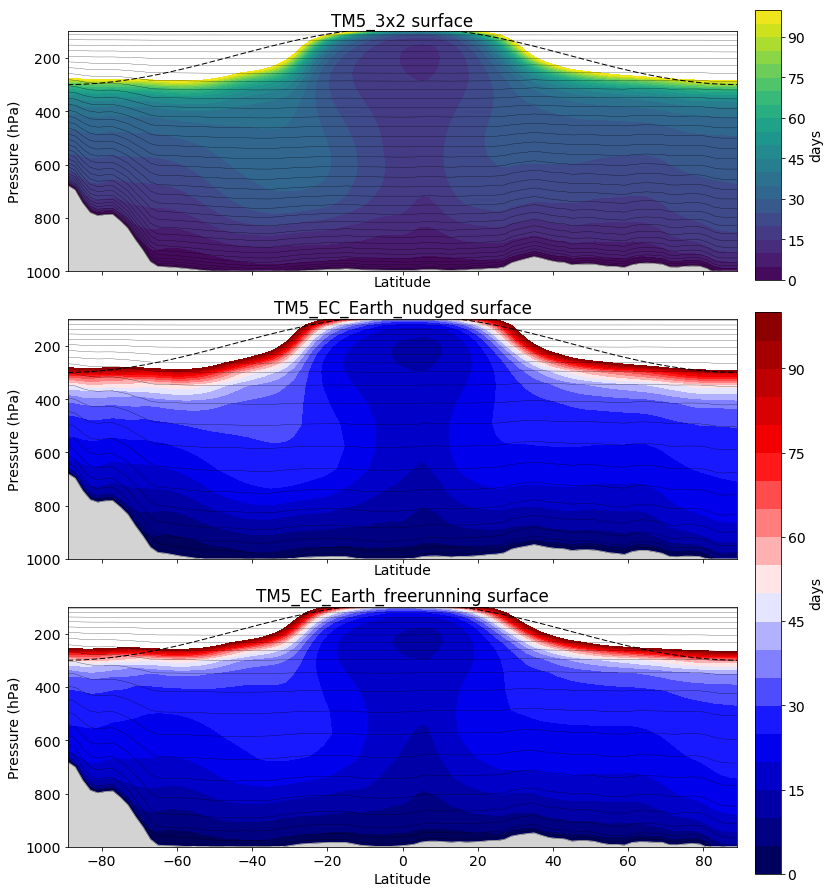

In [183]:
%matplotlib inline
#import analysis tools
path = '/Users/killaars/PhD/2017_AoA/data'
# setup the plotting instance:
aoa = AoA_tools(path)
#aoa.test()
aoa.figure_za_surface()
# aoa.figure_za_NHsurface()
# aoa.figure_za_SHsurface()
# aoa.figure_ll_land()
# aoa.figure_ll_ocean()
# aoa.figure_za_strat()
# aoa.figure_sf6_aoa()
# aoa.figure_sf6_aoa_b()
# aoa.figure_sf6_aoa2()
# aoa.figure_rn_aoa()
# #aoa.figure_rn_aoa2()
# aoa.figure_e90_surf()

In [6]:
import numpy as np
import pylab as pl
from IPython.html.widgets import *
from IPython.html import widgets
#from ipywidgets import *
from IPython.display import display
import os,sys,glob
from netCDF4 import Dataset
from datetime import datetime,timedelta
from mpl_toolkits.basemap import Basemap
%matplotlib inline
#import analysis tools
path = '/Users/killaars/PhD/2017_AoA/data'

pl.rcParams.update({'font.size': 14})
path = path
forcing = 1e-15*3600*24.0  # mixing ratio day-1
dirname = ['TM5_3x2','TM5_EC_Earth_nudged','TM5_EC_Earth_freerunning']
odir = ['TM5_3x2','TM5_EC_Earth_nudged','TM5_EC_Earth_freerunning']

transpose = [False,False,False]
symbol = ['b','bx-','b+-']
symbol2 = ['b--','b--','b-.']
symbol3 = ['b--','b--','b--']


mname = ['TM5','TM5','TM5']
iname = ['UU','EC_Earth','EC_Earth']
tnames = [
  ['rn222','rn222E','SF6','e90','NHsurface','SHsurface','surface','land','ocean','trop','strat'],
  ['rn222','rn222E','SF6','e90','NHsurface','SHsurface','surface','land','ocean','trop','strat'],
  ['rn222','rn222E','SF6','e90','NHsurface','SHsurface','surface','land','ocean','trop','strat'] ,        
]


plot_grid = False
plot_tropo = False
plot_specs = 0
dsf6 = []
dnh  = []
dsh  = []
nh = []
sh = []
latitude = []
d222rn = []
dland  = []
times = []
for year in range(1988,2015):
    for month in range(1,13):
        times.append('year %4.4i month %2.2i'%(year,month))

dates = []
for year in range(2000,2011):
    for month in range(1,13):
        dates.append('year %4.4i month %2.2i'%(year,month))
conversion = 'days'  #               ['mol/mol','nmol/mol','pmol/mol','days','years'
yaxis = 'trop'    #  ToggleButtons(options=['normal','log','trop','strat']),
ptype = 'zonal'     #                ptype = ToggleButtons(options=['zonal','latlon','times','spec']),
amin=0.0    # negative = automatic scaling
amax=100.0
plotpres=50   # hPa
models = ['TM5_3x2','TM5_EC_Earth_nudged','TM5_EC_Earth_freerunning'] 
tracers = ['surface'] # '222Rn' '222RnE' 'SF6' 'e90' 'NHsurface' 'SHsurface' 'surface' 'land' 'ocean' 'troposphere' 'stratosphere'
plot_grid = True
plot_tropo = True
plot_savename = 'surface.png'
#plot_prog(dates, conversion, yaxis, ptype, amin, amax, 
#      plotpres, models, tracers) 

In [ ]:
def get_fields(self,model,itracer,itimes):
    ''' get the 3D concentration field for model for itracer and itimes'''
    imodel = self.odir.index(model)
    self.imodel = imodel
    dsname = "%s/mmean.%s.%s.%s.nc"%(model,self.mname[imodel],self.iname[imodel],self.tnames[imodel][itracer])
    print('in get fields:', dsname)
    if model == 'TM5_EC_Earth_freerunning':
        dsname = "%s/mmean.%s.%s_no_nudging.%s.nc"%(model,self.mname[imodel],self.iname[imodel],self.tnames[imodel][itracer])
        print(dsname)
    ds = Dataset(dsname,'r')
    if model != 'TOMCAT':
        latitude = ds.variables['latitude'][:]
        longitude = ds.variables['longitude'][:]
    else:
        latitude = ds.variables['lat'][:]
        longitude = ds.variables['lon'][:]

    # get and construct 3d pressure field:

    if model.startswith('TM5'):
        if model == 'TM5_3x2':
            dsname = '%s/presm.TM5.UU.nc'%(model)
            ds1 = Dataset(dsname,'r')
            at = ds1.variables['presm'].at
            bt = ds1.variables['presm'].bt
        elif model == 'TM5_EC_Earth_nudged':
            dsname = '%s/presm.TM5.EC_Earth.nc'%(model)
            ds1 = Dataset(dsname,'r')
            itimes = np.array(itimes) - 12*2
            if(itimes[0] < 0) :sys.exit(2)
            a_ec = np.array([ 0.000000, 21.413612, 76.167656, 204.637451,   450.685791, 857.945801, 1463.163940,  
                    2292.155518, 3358.425781,  4663.776367, 6199.839355,  7341.469727, 8564.624023, 
                    9873.560547, 11262.484375, 12713.897461, 14192.009766, 15638.053711, 16990.623047, 
                    18191.029297, 19184.544922, 19919.796875, 20348.916016, 20319.011719, 19348.775391, 
                    17385.595703, 14665.645508, 11543.166992,  8356.252930,  5422.802734, 
                    3010.146973,  1297.656128, 336.772369,     6.575628, 0.000000])
            b_ec = np.array([ 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 
                     0.000000, 0.000000, 0.000000, 0.000055, 0.000279, 0.001000, 0.002765, 0.006322, 0.012508, 
                     0.022189, 0.036227, 0.055474, 0.080777, 0.112979, 0.176091, 0.259554,  0.362203, 0.475016, 
                     0.589317, 0.698224, 0.795385,  0.875518, 0.935157, 0.973466, 0.994204, 1.000000 ])
            at = a_ec[::-1]
            bt = b_ec[::-1]
        elif model == 'TM5_EC_Earth_freerunning':
            dsname = '%s/presm.TM5.EC_Earth_no_nudging.nc'%(model)
            ds1 = Dataset(dsname,'r')
            itimes = np.array(itimes) - 12*2
            if(itimes[0] < 0) :sys.exit(2)
            a_ec = np.array([ 0.000000, 21.413612, 76.167656, 204.637451,   450.685791, 857.945801, 1463.163940,  
                    2292.155518, 3358.425781,  4663.776367, 6199.839355,  7341.469727, 8564.624023, 
                    9873.560547, 11262.484375, 12713.897461, 14192.009766, 15638.053711, 16990.623047, 
                    18191.029297, 19184.544922, 19919.796875, 20348.916016, 20319.011719, 19348.775391, 
                    17385.595703, 14665.645508, 11543.166992,  8356.252930,  5422.802734, 
                    3010.146973,  1297.656128, 336.772369,     6.575628, 0.000000])
            b_ec = np.array([ 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 
                     0.000000, 0.000000, 0.000000, 0.000055, 0.000279, 0.001000, 0.002765, 0.006322, 0.012508, 
                     0.022189, 0.036227, 0.055474, 0.080777, 0.112979, 0.176091, 0.259554,  0.362203, 0.475016, 
                     0.589317, 0.698224, 0.795385,  0.875518, 0.935157, 0.973466, 0.994204, 1.000000 ])
            at = a_ec[::-1]
            bt = b_ec[::-1]
        elif model != 'TM5_EC_Earth':
            dsname = '%s/presm.TM5.UU.nc'%(model)
            ds1 = Dataset(dsname,'r')
            at = ds1.variables['presm'].at
            bt = ds1.variables['presm'].bt
        else:
            dsname = '%s/presm.TM5.EC_Earth.nc'%(model)
            ds1 = Dataset(dsname,'r')
            itimes = np.array(itimes) - 12*2
            if(itimes[0] < 0) :sys.exit(2)
            a_ec = np.array([ 0.000000, 21.413612, 76.167656, 204.637451,   450.685791, 857.945801, 1463.163940,  
                    2292.155518, 3358.425781,  4663.776367, 6199.839355,  7341.469727, 8564.624023, 
                    9873.560547, 11262.484375, 12713.897461, 14192.009766, 15638.053711, 16990.623047, 
                    18191.029297, 19184.544922, 19919.796875, 20348.916016, 20319.011719, 19348.775391, 
                    17385.595703, 14665.645508, 11543.166992,  8356.252930,  5422.802734, 
                    3010.146973,  1297.656128, 336.772369,     6.575628, 0.000000])
            b_ec = np.array([ 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 
                     0.000000, 0.000000, 0.000000, 0.000055, 0.000279, 0.001000, 0.002765, 0.006322, 0.012508, 
                     0.022189, 0.036227, 0.055474, 0.080777, 0.112979, 0.176091, 0.259554,  0.362203, 0.475016, 
                     0.589317, 0.698224, 0.795385,  0.875518, 0.935157, 0.973466, 0.994204, 1.000000 ])
            at = a_ec[::-1]
            bt = b_ec[::-1]

        presm = ds1.variables['presm'][itimes]
        ntim = presm.shape[0]
        nlon = presm.shape[2]
        nlat = presm.shape[1]
        nlev = at.shape[0]-1
        ds1.close()
        # fill 3D pressure at mid-level:
        pressure = np.zeros((ntim,nlev,nlat,nlon))
        for i,pres in enumerate(presm):
            for l in range(nlev):
                pressure[i,l,:,:] = 0.5*(at[l]+at[l+1]) + pres*0.5*(bt[l]+bt[l+1])
        print('pressure=',np.shape(pressure))

    else:
        pressure = ds.variables['pressure'][:]  

        #pressure = pressure*1e2

    # finally get the dataset needed: also sample the pressures selected:
    if self.transpose[imodel]:
        conc = ds.variables['conc'][:,:,:,itimes]
        conc = np.transpose(conc,axes=[3,2,1,0])
        pressure = np.transpose(pressure,axes=[3,2,1,0])
    # make sure ordered in the right way!
    ds.close()
    #print(conc.min(),conc.max())
    #print(longitude)
    #print(latitude)
    #print(pressure)
    return longitude,latitude,pressure,conc

cpath = os.getcwd()
os.chdir(path)
itimes = []
for idate in dates:
    itimes.append(self.times.index(idate))
year = int(dates[0].split()[1])
month = int(dates[0].split()[3])
tstart = datetime(1988,1,1,0,0,0)

# get end time:
tss = datetime(year,month,1,0,0,0)
if len(dates) == 1:
    monthp1 = month + 1
    yearp1 = year
    if monthp1 ==13:
        monthp1 = 1
        yearp1 = year + 1
    xdt = datetime(yearp1,monthp1,1,0,0,0) - tss
    tanal = tss + xdt/2
else:
    yeare = int(dates[-1].split()[1])
    monthe = int(dates[-1].split()[3])
    monthp1 = monthe + 1
    yearp1 = yeare
    if monthp1 ==13:
        monthp1 = 1
        yearp1 = yeare + 1
xdt = datetime(yearp1,monthp1,1,0,0,0) - tss
tanal = tss + xdt/2
#print(tstart,tanal,tss,xdt)
dt = (tanal-tstart).days + (tanal-tstart).seconds/(3600.*24.)
#print(self.dt)

# for time series: get list of datetimes:
if len(dates) > 1:
    xtimes = []
    xdt = []
    for idate in dates:
        year = int(idate.split()[1])
        month = int(idate.split()[3])
        monthp1 = month + 1
        yearp1 = year
        datet1 = datetime(year,month,1)
        if monthp1 ==13:
            monthp1 = 1
            yearp1 = year + 1
        datet2 = datetime(yearp1,monthp1,1)
        dt = datet2-datet1
        xanal = datet1 + dt/2
        xtimes.append(xanal)
        xdt.append((xanal-tstart).days + (xanal-tstart).seconds/(3600.*24.))

first_tracer = True
for tracer in tracers:
    nmodels = len(models)
    if ptype != 'times' and ptype != 'spec':
        if (nmodels == 5 and ptype == 'latlon'):
            f,ax = pl.subplots(nmodels,figsize=(9,nmodels*5),sharex=True)   
        elif (nmodels == 6 and ptype == 'latlon'):
            f,ax = pl.subplots(3,2,figsize=(15,12),sharex=True,sharey=True)
        elif (nmodels == 6 and ptype == 'zonal'):
            f,ax = pl.subplots(3,2,figsize=(15,12),sharex=True,sharey=True)
        else:
            f,ax = pl.subplots(nmodels,figsize=(12,nmodels*5),sharex=True)
    elif ptype == 'times':
        f,ax = pl.subplots(1,figsize=(12,5))   
    else:
        None
    itracer = tnames[0].index(tracer)
    ipl = 0
    first_model = True
    for i,model in enumerate(models):
        if ptype != 'times' and ptype != 'spec':
            if nmodels == 1: 
                axi = ax
            elif ax.ndim == 1:
                axi = ax[i]
            else: # dim = 2
                ydim = ax.shape[0]
                xdim = ax.shape[1]
                axi = ax[np.mod(i,ydim),i/ydim]
        else:
            axi=ax
        #try:
        longitude,latitude,pressure,conc = get_fields(model,itracer,itimes)
        #except:
        #    continue  # skip this model if fail
        if ptype == 'zonal':
            if i == 0:
                conc = conc.mean(axis=0)   # average over the times
                pressure = pressure.mean(axis=0) # average over times
                axp = plot_za(axi,conc,latitude,pressure,conversion,yaxis)
            else:
                longitude_offline,latitude_offline,pressure_offline,conc_offline = get_fields(models[0],itracer,itimes)
                print(np.shape(conc.mean(axis=0)),np.shape(conc_offline.mean(axis=0)))
                conc = conc.mean(axis=0)-conc.mean(axis=0)   # average over the times
                pressure = pressure.mean(axis=0)-pressure.mean(axis=0) # average over times
                axp = plot_za(axi,conc,latitude,pressure,conversion,yaxis)
        ipl +=1
        first_model = False
    print('ptype:',ptype)
    if ptype != 'times' and ptype != 'spec':
        cax = f.add_axes([0.92, 0.1, 0.03, 0.8])
        cbar = f.colorbar(axp,cax=cax)
        cbar.set_label(conversion)
        #f.savefig(self.plot_savename)
        f.show()
    elif ptype != 'spec':
        #  axi.legend(loc='best')
        axi.set_title(self.tracer)
        f.autofmt_xdate()
        f.savefig(self.plot_savename)
        f.show()
    else:   # special plot over multiple tracers:
        None
    self.first_tracer = False


os.chdir(cpath)

In [7]:
def plot_za( self, axi, conc, latitude, pressure, conversion, yaxis):
    aoalist = ['NHsurface','SHsurface','surface','land','ocean','troposphere','stratosphere'] 
    conc = conc.mean(axis=2)
    Y = pressure.mean(axis=2)*1e-2
    X = np.zeros(conc.shape)

    for l in range(conc.shape[0]):
        X[l,:] = latitude
    ## X,Y = np.meshgrid(latitude,pressure*1e-2)

    if self.model != 'TM5_EC_Earth_nudged' :
        deltat = self.dt
    else:
        deltat = self.dt - (365+366)    # no 1988 and 1989!

    if (conversion=='days'):
        conc = (deltat - conc/self.forcing)
    elif (conversion=='years'): 
        conc = (deltat - conc/self.forcing)/365.
    elif conversion=='pmol/mol':
        conc = conc*1e12
    elif conversion=='nmol/mol':
        conc = conc*1e9
    elif conversion=='zmol/mol':
        conc = conc*1e21
    if (conversion.endswith('mol/mol')):
        # temp
        zmin = conc.min()
    else:
        zmin = 0.0

    if self.ipl ==0: 
        if (self.amin > -1e-10 and self.amax > 0):   # automatic scaling:
            self.v = self.amin + np.arange(21)*(self.amax - self.amin)/20
        else:
            self.v = zmin + np.arange(21)*(conc.max() - zmin)/20 
    axp = axi.contourf(X,Y,conc,self.v)
    #if len(self.dates)==1:
    #    axi.set_title(self.model+' '+self.tracer+' '+self.dates[0])
    #else:
    #    axi.set_title(self.model+' '+self.tracer+' '+self.dates[0]+'-'+self.dates[-1])
    axi.set_title(self.model+' '+self.tracer)
    if yaxis=='normal':
        axi.set_ylim(1e3,0)
    elif yaxis=='log':
        axi.set_ylim(1e2,0.1)
        axi.set_yscale('log')
    elif yaxis=='trop':
        axi.set_ylim(1e3,1e2)  
    elif yaxis=='strat':
        axi.set_ylim(1e2,0)  
    else:
        axi.set_ylim(1e3,0)
    axi.set_xlabel('Latitude')
    axi.set_ylabel('Pressure (hPa)')

    # add orography as a polygon:
    points = [(latitude[0],1000)]
    for i,lat in enumerate(latitude):
        points.append((lat,Y[0,i]))
    points.append((latitude[-1],1000))
    polygon = pl.Polygon(points)
    polygon.set_facecolor('lightgrey')
    polygon.set_edgecolor('lightgrey')
    axi.add_patch(polygon)

    # add grid if requested:
    if self.plot_grid:
        for l in range(Y.shape[0]):
            axi.plot(latitude,Y[l,:],color='black',linewidth=0.25)
    if self.plot_tropo:
        axi.plot(latitude,300.0 - 215*(np.cos(latitude*np.pi/180.0))**2,color='black',linewidth=1,linestyle='--')
    return axp